# Kaggle competition for House Prices.

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Data/House_prediction_krish/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

<AxesSubplot:>

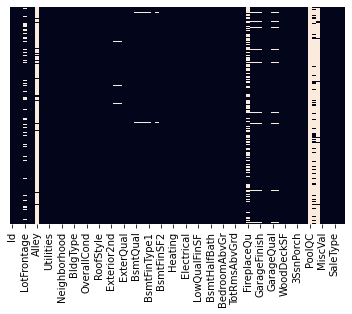

In [5]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)#Checking the null values using visualization

In [6]:
df.isnull().sum() #checking for missing values in the dataframe.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## Fill Missing Values
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [9]:
df.drop(["Alley"], axis=1, inplace=True)#dropping the alley column has it contains many features.

In [10]:
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])#For categorical feature I am replacing them with the mode.
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

In [11]:
df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

In [12]:
df.drop(["GarageYrBlt"], axis=1, inplace=True)

In [13]:
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])

df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])

In [14]:
df.drop(["PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [16]:
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])

<AxesSubplot:>

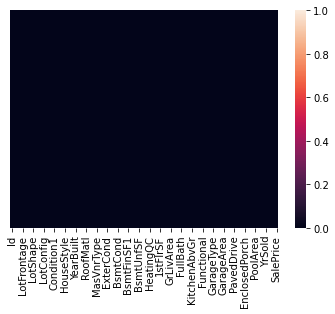

In [17]:
sns.heatmap(df.isnull(), yticklabels = False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
df.shape

(1460, 76)

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [84]:
# columns = ["Exterior1st", "Exterior2nd", "MasVnrType",
#           "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
#            "GarageQual", "GarageCond", "PavedDrive"
# ]
columns = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood","Condition2",
          "BldgType", "Condition1", "HouseStyle", "SaleType", "SaleCondition", "ExterCond", "ExterQual", "Foundation", "BsmtQual",
          "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
          "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
           "GarageQual", "GarageCond", "PavedDrive"
]
# columns = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "Lotconfig", "landSlope", "Neighborhood","Condition2",
#           "BldgType", "Condition1", "HouseStyle", "SaleType", "SaleCondition", "ExterCond", "ExterQual", "Foundation", "BsmtQual",
#           "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
#           "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
#            "GarageQual", "GarageCond", "PavedDrive"
# ]

In [85]:
final_df = category_onehot_multcols(columns)

MSZoning


KeyError: 'MSZoning'

In [86]:
len(columns)

39

In [88]:
def category_onehot_multcols(multcolumns):
    df_final = final_df
    i = 0
    for fields in multcolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        
        final_df.drop([fields] , axis = 1, inplace=True)
        if i == 0:
            df_final  = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis = 1)
        i=i+1
    
    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final

In [89]:
main_df = df.copy()

In [41]:
# columns1 = [ 'MSZoning','Street',
#        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
#        'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#        'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'ExterQual',
#         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
#        'BsmtFinType1',  'BsmtFinType2', 
#         'Heating', 'HeatingQC', 'CentralAir',
#        'Electrical', 
#        'Functional', 'FireplaceQu', 'GarageType',
#        'GarageFinish', 'GarageArea', 'GarageQual',
#        'GarageCond', 'PavedDrive'
# ]

In [25]:
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 

In [31]:
test_df = pd.read_csv("formulatedtest.csv") #Combining the test data


In [33]:
test_df.shape

(1449, 75)

In [90]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [91]:
final_df = pd.concat([df,test_df], axis=0)

In [92]:
final_df.shape

(2909, 76)

In [93]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [94]:
final_df.shape

(2909, 237)

In [96]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [98]:
final_df.shape

(2909, 177)

In [105]:
final_df.drop(columns = "Id", axis=1, inplace=True)

In [107]:
final_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [108]:
df_Train = final_df.iloc[:1454, :]
df_Test = final_df.iloc[1454:,:]

In [109]:
df_Test.drop(["SalePrice"], axis = 1, inplace=True)

C:\Users\ABOVE ALL OMOLERE\AppData\Local\Temp\ipykernel_27840\2884854021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(["SalePrice"], axis = 1, inplace=True)


In [110]:
df_Test.shape

(1455, 175)

In [111]:
X_train = df_Train.drop(["SalePrice"], axis=1)
y_train = df_Train["SalePrice"]

In [112]:
#Model Building

In [113]:
import xgboost
classifier = xgboost.XGBRegressor()

In [114]:
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
import pickle
filename  = "finalized_model.pkl"
pickle.dump(classifier, open(filename, "wb"))

In [117]:
y_pred = classifier.predict(df_Test)

In [118]:
y_pred

array([193907.52, 173789.89, 199402.45, ..., 174131.67, 106119.96,
       237656.53], dtype=float32)

In [119]:
pred = pd.DataFrame(y_pred)

In [123]:
# sub_df = pd.read_csv("sample_submission.csv")
# datasets = pd.concat([sub_df["Id"], pred], axis=1)
# datasets.columns = ["Id", "SalePrice"]
# datasets.to_csv("sample_submisson.csv", index=False)